In [1]:
import osnap
import libpysal as lps

/Users/knaaptime/anaconda/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [ ]:
from libpysal.weights.distance import KNN


In [ ]:
#la = osnap.data.metros[osnap.data.metros.NAME.str.startswith("Los Angeles")]

In [ ]:
md = osnap.data.Dataset(states='24', counties='031', name='moco', source='ltdb')

In [2]:
md2 = osnap.data.Dataset(states='24', counties='031', name='moco', source='ltdb', add_indices=['11001002101', '11001002001', '11001001803'])

/Users/knaaptime/python_packages/geopandas/geopandas/plotting.py:92: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if None in values:


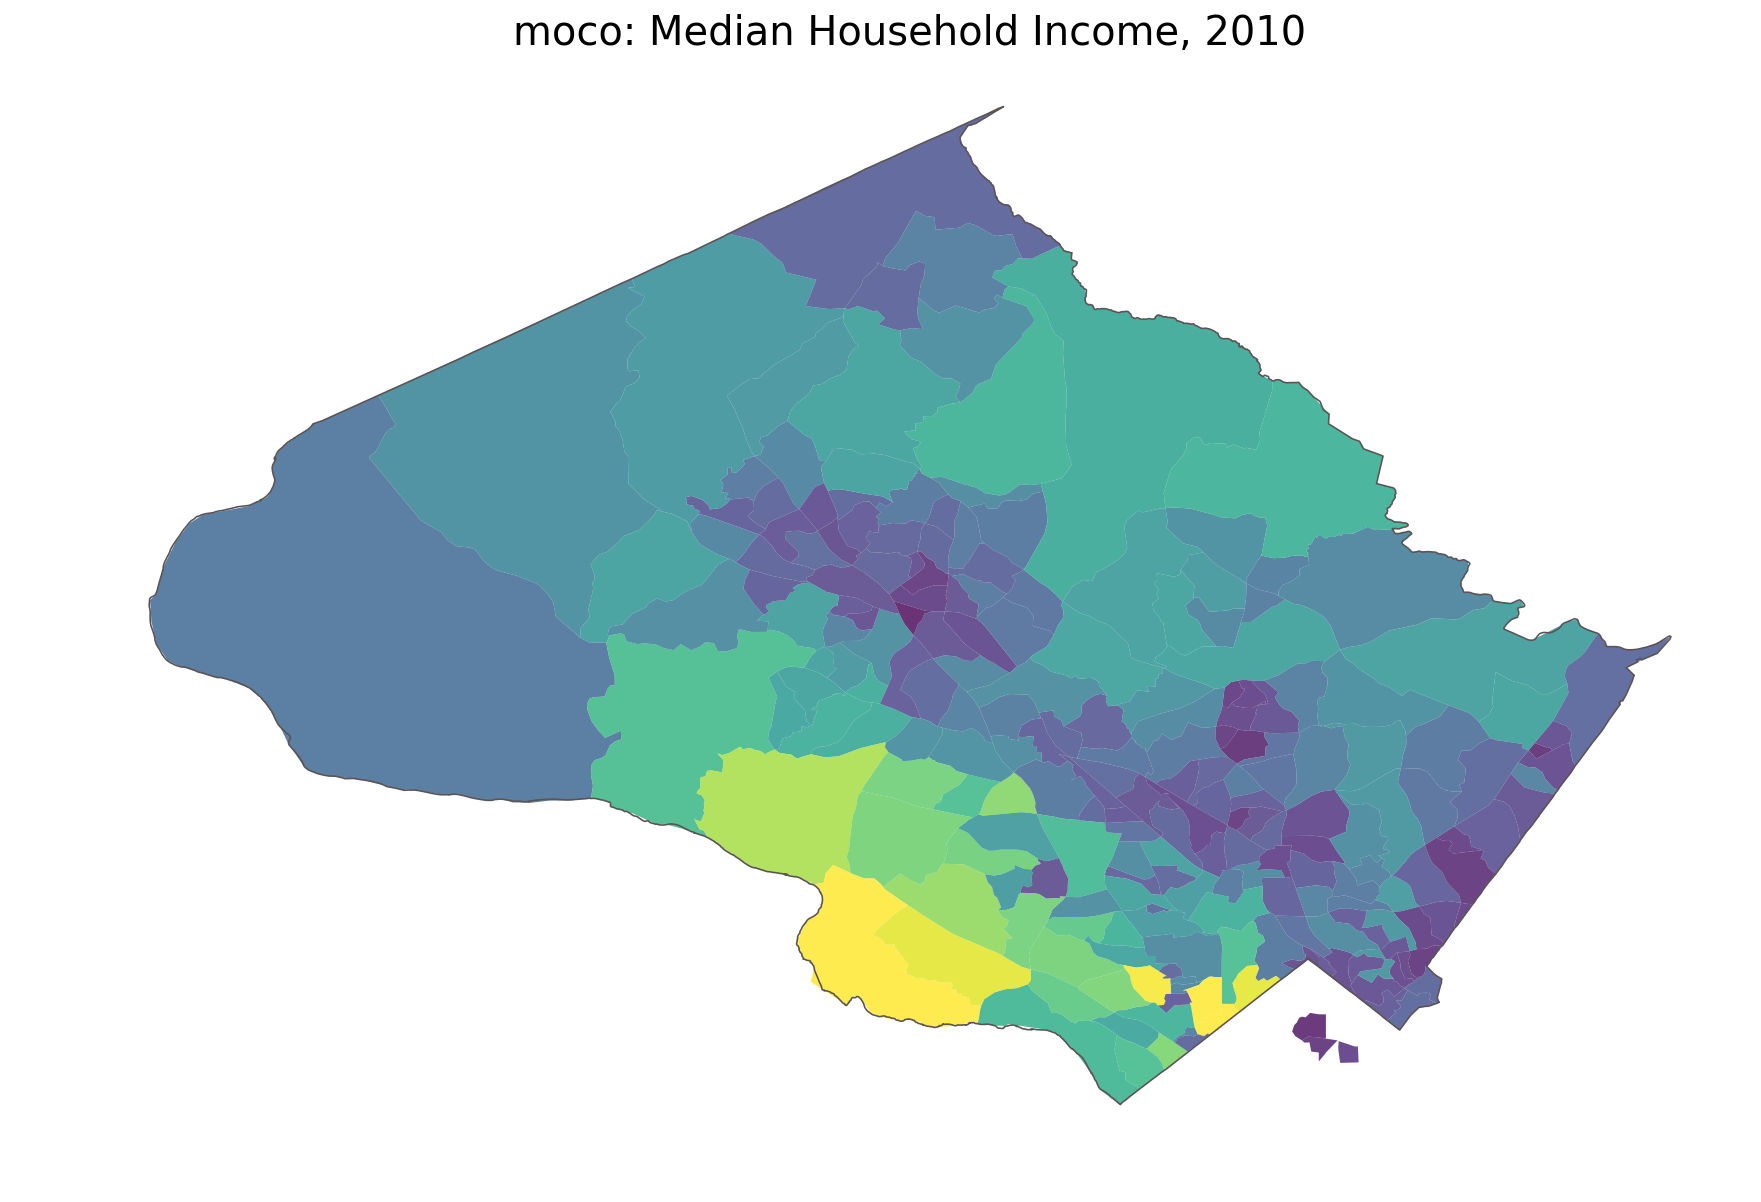

In [3]:
md2.plot(column='median_household_income')

In [4]:
md2.data[md2.data.index.str.startswith('1')]

,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,n_native_over_60,...,n_widowed_divorced,n_white_persons,year,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled
geoid,,,,,,,,,,,,,,,,,,,,,
11001001803,NaN,739.0,NaN,NaN,49.0,898.0,NaN,277.0,NaN,NaN,...,816.0,986.0,1970,NaN,10.0,6.0,NaN,NaN,NaN,5.0
11001002001,NaN,442.0,NaN,NaN,37.0,562.0,NaN,217.0,NaN,NaN,...,472.0,490.0,1970,NaN,10.0,9.0,NaN,NaN,NaN,7.0
11001002101,NaN,1692.0,NaN,NaN,24.0,1971.0,NaN,462.0,NaN,NaN,...,1070.0,307.0,1970,NaN,3.0,7.0,NaN,NaN,NaN,8.0
11001001803,0.0,309.0,0.0,0.0,7.0,428.0,0.0,360.0,0.0,0.0,...,750.0,NaN,1980,11.0,6.0,13.0,0.0,0.0,0.0,6.0
11001002001,0.0,155.0,25.0,0.0,40.0,232.0,0.0,146.0,0.0,0.0,...,351.0,NaN,1980,18.0,5.0,10.0,0.0,0.0,0.0,5.0
11001002101,0.0,990.0,41.0,0.0,0.0,1304.0,0.0,788.0,0.0,0.0,...,1349.0,NaN,1980,2.0,2.0,14.0,0.0,0.0,0.0,8.0
11001001803,3.0,329.0,49.0,2.0,23.0,425.0,4.0,517.0,11.0,0.0,...,701.0,NaN,1990,8.0,3.0,19.0,0.0,0.0,0.0,7.0
11001002001,6.0,260.0,48.0,4.0,74.0,435.0,5.0,364.0,18.0,3.0,...,555.0,NaN,1990,18.0,4.0,15.0,1.0,0.0,0.0,10.0
11001002101,8.0,948.0,30.0,3.0,15.0,1090.0,6.0,974.0,21.0,3.0,...,1222.0,NaN,1990,1.0,1.0,18.0,0.0,0.0,0.0,14.0


In [ ]:
clus = osnap.analytics.cluster(md, columns=['median_household_income', 'p_poverty_rate', \
                                               'p_edu_college_greater', 'p_unemployment_rate'], method='ward')

In [ ]:
clus.plot(column='ward')

In [ ]:
#clus.data.columns
md.data.columns

In [ ]:
import copy

In [ ]:
md2 = copy.deepcopy(md)

In [ ]:
md2

In [ ]:
spatial = osnap.analytics.cluster_spatial(md, columns=['median_household_income', 'p_poverty_rate', \
                                               'p_edu_college_greater', 'p_unemployment_rate'], method='spenc', floor=0)

In [ ]:
spatial = osnap.analytics.cluster_spatial(md, columns=['median_household_income', 'p_poverty_rate', 'p_edu_college_greater', 'p_unemployment_rate'], method='spenc')


In [ ]:
spatial.plot(column='spenc', year=1980)

In [ ]:
spatial.plot(column='ward_spatial', year=2000)

In [ ]:
la_metro.plot(column='median_household_income')

In [ ]:
c = osnap.analytics.cluster(la_metro, columns=['median_household_income', 'p_poverty_rate', \
                                               'p_edu_college_greater', 'p_unemployment_rate'], method='ward')

In [ ]:
la_metro.data

In [ ]:
test= osnap.analytics(la_metro, )

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10, 10), sharex='col', sharey='row')
#fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

c.plot(column='ward', year=1980, ax=ax[0,0])
ax[0,0].set_title('1980')
ax[0,0].axis('off')

c.plot(column='ward', year=1990, ax=ax[0,1])
ax[0,1].set_title('1990')
ax[0,1].axis('off')

c.plot(column='ward', year=2000, ax=ax[1,0])
ax[1,0].set_title('2000')
ax[1,0].axis('off')

c.plot(column='ward', year=2010, ax=ax[1,1])
ax[1,1].set_title('2010')
ax[1,1].axis('off')

In [ ]:
knnw = KNN.from_dataframe(la_metro.tracts, k=1)

In [ ]:
la_metro.plot(column='median_household_income', year=1980)

In [ ]:
from spenc import SPENC

In [ ]:
SPENC?